## Interpolations

In [65]:
using Interpolations
using Test

### Unstructured 2D grid interpoation

In [66]:
num_points_x = 7
num_points_y = 5

xpoints = [x^2 for x in 1:num_points_x] .+ collect(1:num_points_x)
ypoints = sort!([.2y*rand() for y in 1:num_points_y])

f(x,y) = 2*x*y
f_points = [f(x,y) for x in xpoints, y in ypoints]

nodes = (xpoints, ypoints)

axis_interpolation_x = Gridded(Linear())
axis_interpolation_y = Gridded(Linear())


itp = interpolate(nodes, f_points, (axis_interpolation_x, axis_interpolation_y))

# Point to interpolate
x_interpolated = (maximum(xpoints)/2, maximum(ypoints)/2)

@show itp(x_interpolated...)
@show f(x_interpolated...)

itp(x_interpolated...) = 17.21860652967939
f(x_interpolated...) = 17.21860652967939


17.21860652967939

In [86]:
points = [(0.,0.), (.25,.5), (.75,0.9), (2.,1.2)]
xpoints = getindex.(points,1)
ypoints = getindex.(points,2)
f_vec = [f(p...) for p in points]
f_matrix = reshape(f_vec, (2,2))

nodes = (xpoints, ypoints)
itp = interpolate(nodes, f_matrix, (axis_interpolation_x, axis_interpolation_y))


([0.0, 0.25, 0.75, 2.0], [0.0, 0.5, 0.9, 1.2])

## Visualize the data

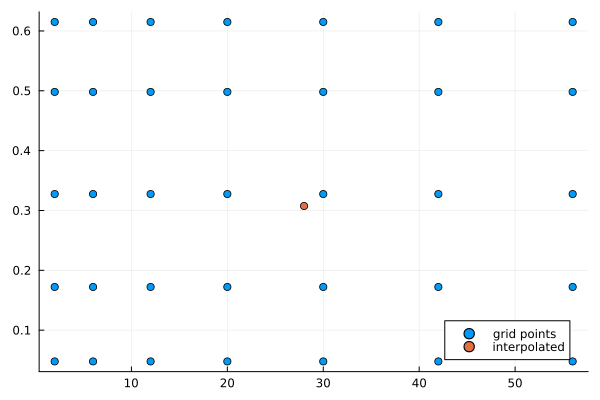

In [67]:
scatter(vec(collect(Iterators.product(xpoints, ypoints))), label="grid points")
scatter!(x_interpolated, label="interpolated")

## Plot the error

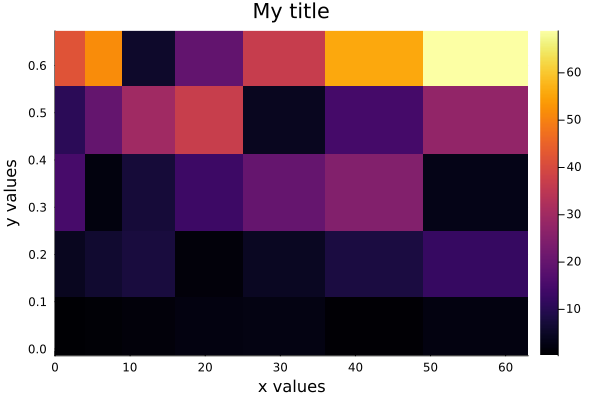

In [69]:
using Plots


gr()
data = rand(21,100)
heatmap(xpoints,
    ypoints,
    f_points,
    xlabel="x values", ylabel="y values",
    title="My title")
